converter

In [1]:
import os
import numpy as np
from PIL import Image

def load_images_from_folder(folder, img_size=(28, 28)):
    images = []
    labels = []
    # Loop through subfolders '0' and '1' inside the folder
    for label in ['0', '1']:
        subfolder = os.path.join(folder, label)
        if os.path.exists(subfolder):
            for filename in os.listdir(subfolder):
                img_path = os.path.join(subfolder, filename)
                # Open the image file
                img = Image.open(img_path)
                # Convert image to RGB to ensure 3 channels
                img = img.convert('RGB')
                # Resize the image to 28x28
                img = img.resize(img_size)
                # Convert the image to a numpy array (keep color channels)
                img_array = np.array(img)
                # Append image and corresponding label (0 or 1)
                images.append(img_array)
                labels.append(int(label))
    return np.array(images), np.array(labels)

# Paths to your train and test folders (replace with your actual paths)
train_folder = '/content/drive/MyDrive/tester/training_file'
test_folder = '/content/drive/MyDrive/tester/test_file'

# Load training and testing data
train_images, train_labels = load_images_from_folder(train_folder)
test_images, test_labels = load_images_from_folder(test_folder)

# Save the data in a similar format as tf.keras.datasets.fashion_mnist
np.savez('custom_fmnist.npz',
         train_images=train_images, train_labels=train_labels,
         test_images=test_images, test_labels=test_labels)

print("Data has been saved as custom_fmnist.npz")


Data has been saved as custom_fmnist.npz


In [2]:
import os
import numpy as np
from PIL import Image

def load_images_from_folder(folder, img_size=(28, 28)):
    images = []
    labels = []
    # Loop through subfolders '0' and '1' inside the folder
    for label in ['0', '1']:
        subfolder = os.path.join(folder, label)
        if os.path.exists(subfolder):
            for filename in os.listdir(subfolder):
                img_path = os.path.join(subfolder, filename)
                # Open the image file
                img = Image.open(img_path)

                # Convert the image to grayscale (black and white)
                img_bw = img.convert('L')  # 'L' mode is grayscale

                # Resize the image to 28x28
                img_bw = img_bw.resize(img_size)

                # Convert the grayscale image to a numpy array
                img_array_bw = np.array(img_bw)

                # Invert the image (white becomes black, black becomes white)
                img_array_inverted = 255 - img_array_bw  # Invert grayscale image

                # Append original grayscale image and label
                images.append(img_array_bw)
                labels.append(int(label))

                # Append inverted grayscale image and label (same label as original)
                images.append(img_array_inverted)
                labels.append(int(label))

    return np.array(images), np.array(labels)

# Paths to your train and test folders (replace with your actual paths)
train_folder = '/content/drive/MyDrive/tester/training_file'
test_folder = '/content/drive/MyDrive/tester/test_file'

# Load training and testing data
train_images, train_labels = load_images_from_folder(train_folder)
test_images, test_labels = load_images_from_folder(test_folder)

# Save the data in a similar format as tf.keras.datasets.fashion_mnist
np.savez('custom_fmnist_bw.npz',
         train_images=train_images, train_labels=train_labels,
         test_images=test_images, test_labels=test_labels)

print("Data has been saved as custom_fmnist_bw.npz")


Data has been saved as custom_fmnist_bw.npz


In [ ]:
import numpy as np

# Load the custom dataset from the .npz file
data = np.load('custom_fmnist.npz')

# Extract the arrays
train_images = data['train_images']
train_labels = data['train_labels']
test_images = data['test_images']
test_labels = data['test_labels']

# Check the shapes of the arrays
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (12, 28, 28, 3)
Train labels shape: (12,)
Test images shape: (6, 28, 28, 3)
Test labels shape: (6,)


Showing Training Dataset


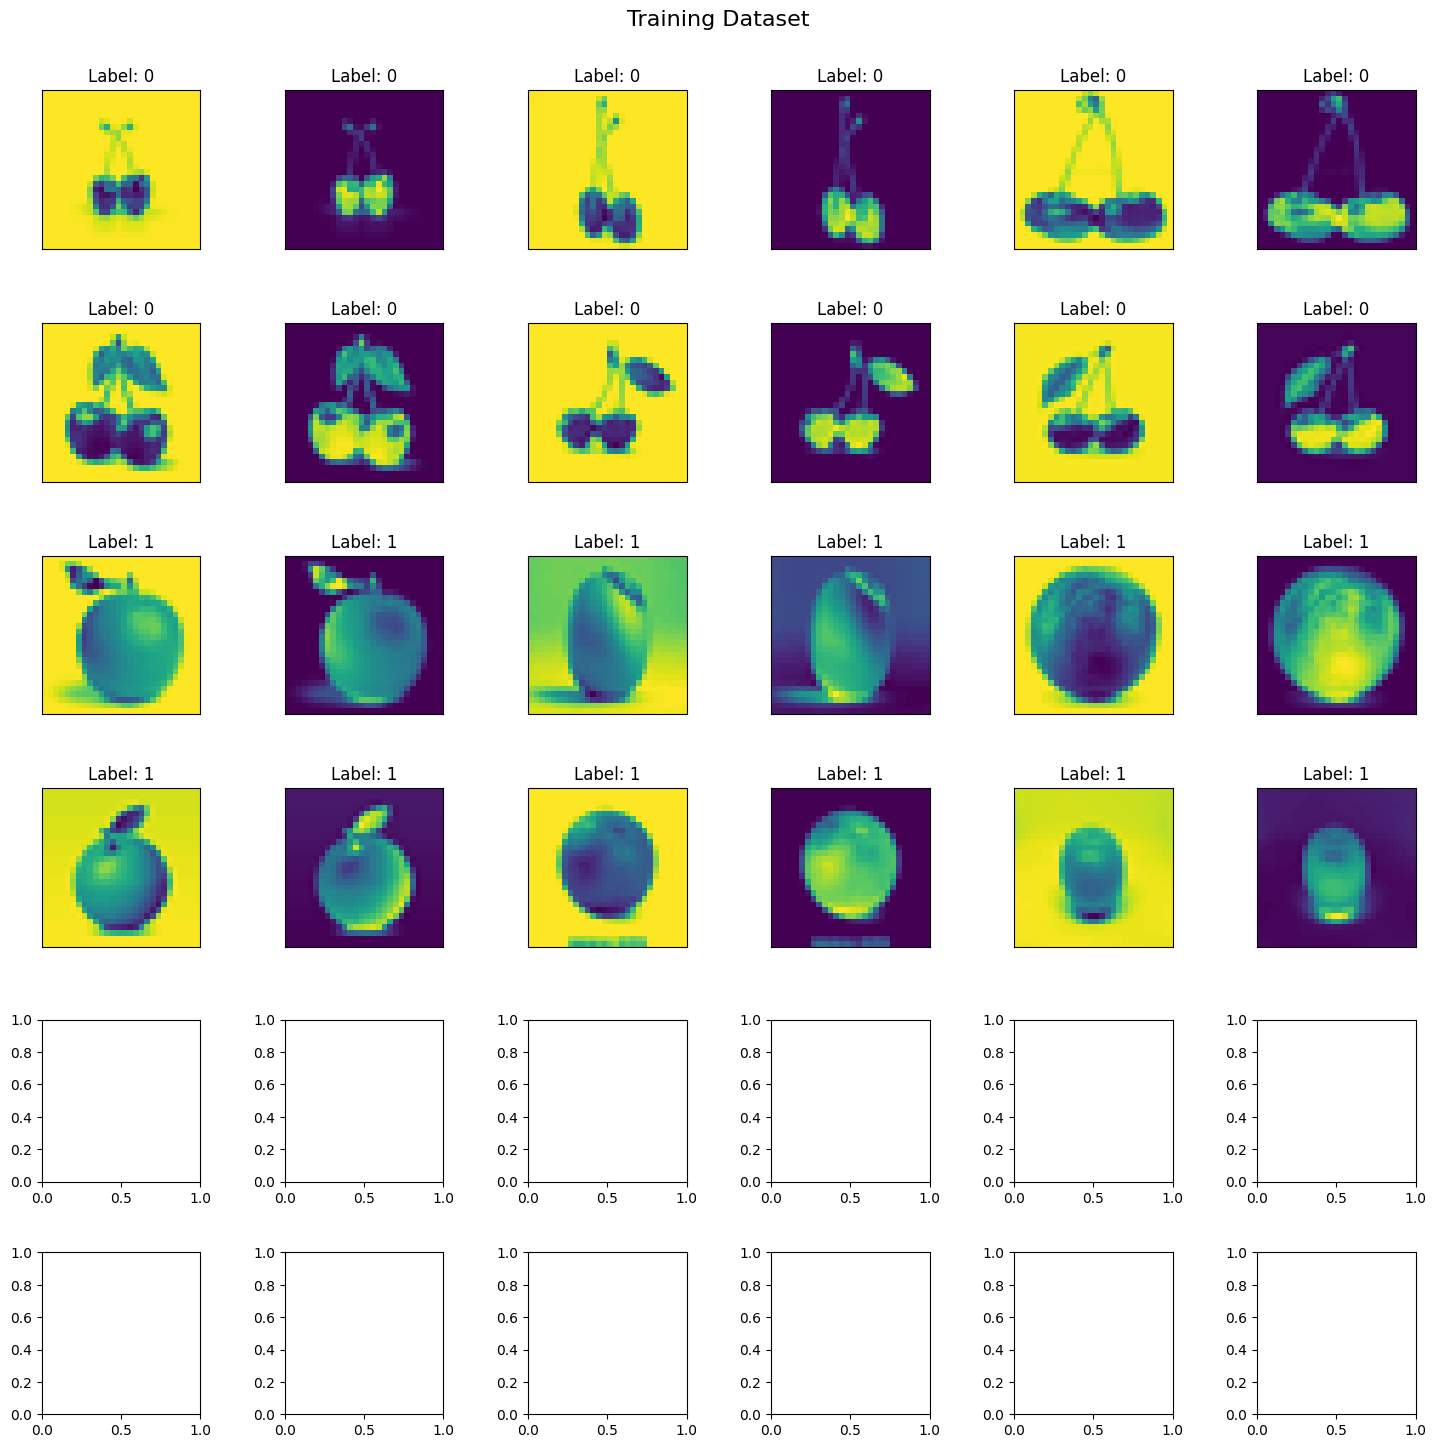

Showing Testing Dataset


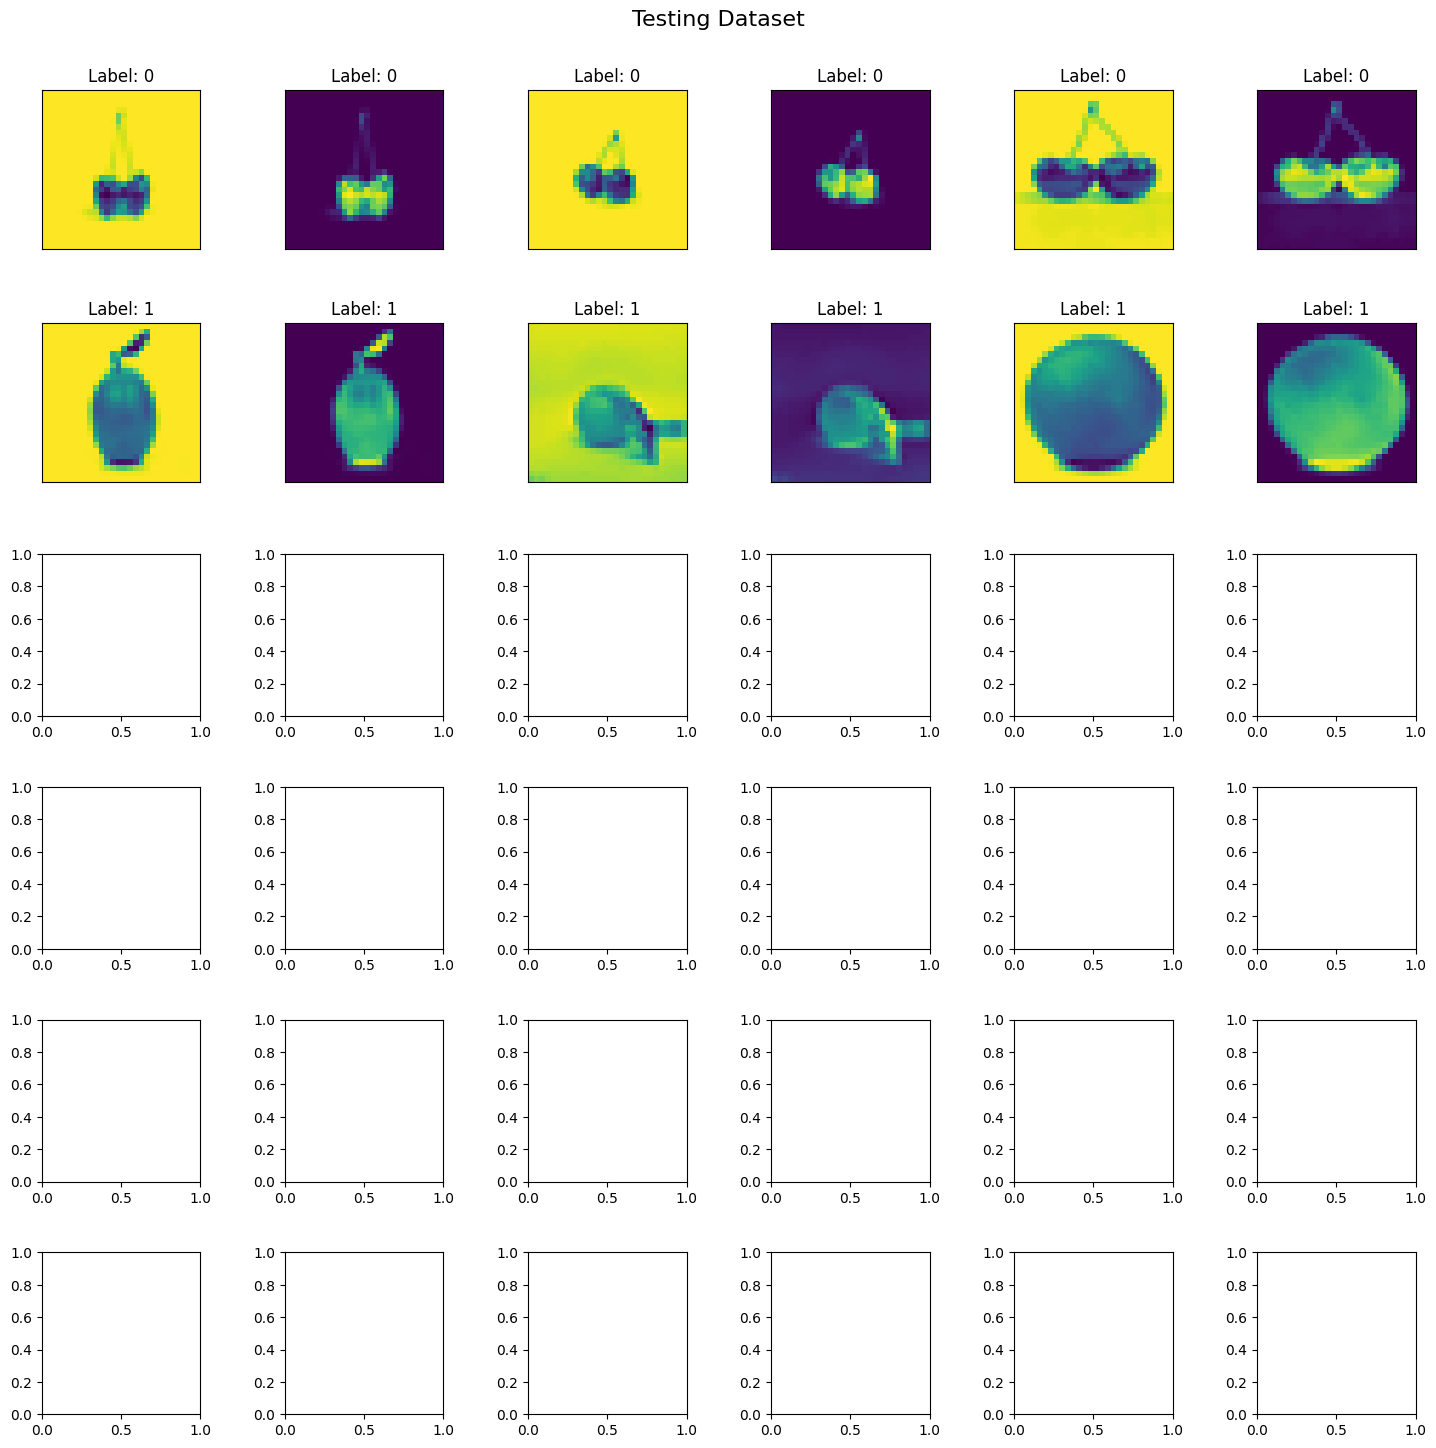

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def show_images_in_grid(images, labels=None, grid_size=(10, 10), start_idx=0, dataset_name=""):
    # Calculate the total number of images to display
    num_images = grid_size[0] * grid_size[1]

    # Create a figure with the specified grid size
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 15))
    fig.suptitle(f"{dataset_name} Dataset", fontsize=16)  # Add title for dataset name
    fig.tight_layout(pad=3.0)

    for i, ax in enumerate(axes.flat):
        if start_idx + i < len(images):
            # Show the image
            ax.imshow(images[start_idx + i])

            # Show label if provided
            if labels is not None:
                ax.set_title(f"Label: {labels[start_idx + i]}")

            # Remove axis ticks for a cleaner look
            ax.set_xticks([])
            ax.set_yticks([])

    # Show the grid of images
    plt.show()

# Load the custom dataset from the .npz file
data = np.load('custom_fmnist_bw.npz')

# Extract train and test images and labels
train_images = data['train_images']
train_labels = data['train_labels']
test_images = data['test_images']
test_labels = data['test_labels']

# Show the training images in a grid (adjust grid size based on dataset size)
print("Showing Training Dataset")
show_images_in_grid(train_images, train_labels, grid_size=(6, 6), dataset_name="Training")

# Show the test images in a grid
print("Showing Testing Dataset")
show_images_in_grid(test_images, test_labels, grid_size=(6, 6), dataset_name="Testing")
